# Problem statement

The objective is to cluster the customers of an e-commerce platform into distinct groups based on their purchasing behavior.

The dataset contains the following columns:

- InvoiceNo (integer)
- StockCode (string)
- Description (string)
- Quantity (integer)
- InvoiceDate (date)
- UnitPrice (decimal)
- CustomerID (integer)
- Country (string)

By analyzing the TotalAmount spent and TotalTransactions made by each customer, the company aims to identify different customer segments for targeted marketing strategies, personalized product offerings, and improved customer service.

The clustering process involves data preprocessing, feature engineering, outlier detection and removal, data scaling, and optimal cluster determination through both the Elbow Method and Silhouette Score, culminating in the application of K-Means clustering to categorize customers into meaningful segments.

The notebook contains 6 exercises in total:

* [Exercise 1](#ex_1)
* [Exercise 2](#ex_2)
* [Exercise 3](#ex_3)
* [Exercise 4](#ex_4)
* [Exercise 5](#ex_5)
* [Exercise 6](#ex_6)

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
#from sklearn_extra.cluster import KMeansExtra

# Step 1: Load the Dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('clustering-data.csv', encoding='latin1')

Shape of the DataFrame: (541909, 8)

First few rows of the DataFrame:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Column names and data types:
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     objec

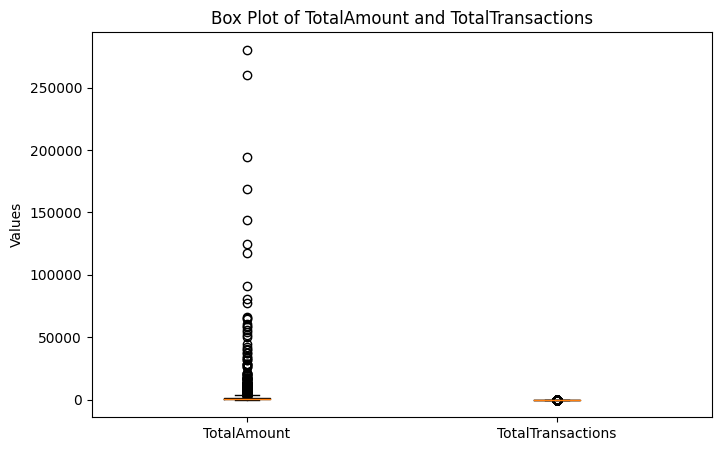

Shape of DataFrame after removing outliers: (3912, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

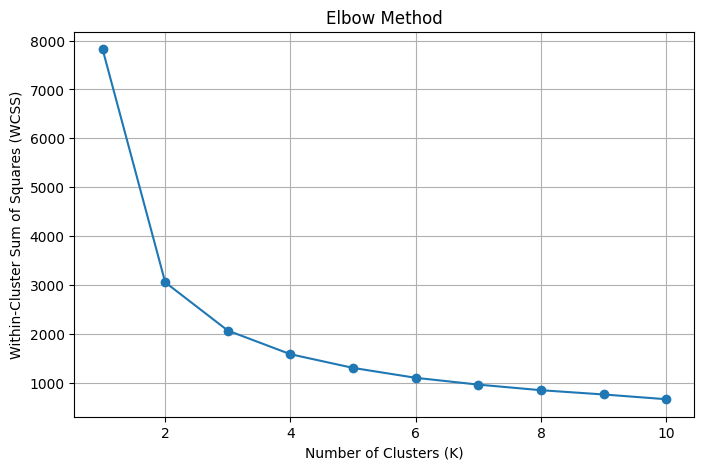

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

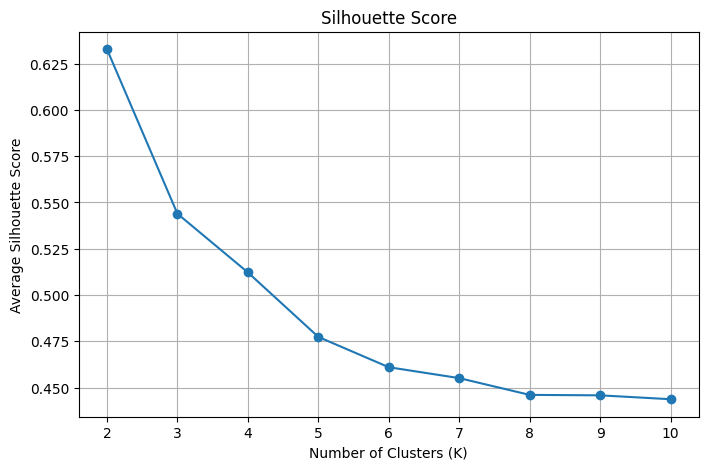

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


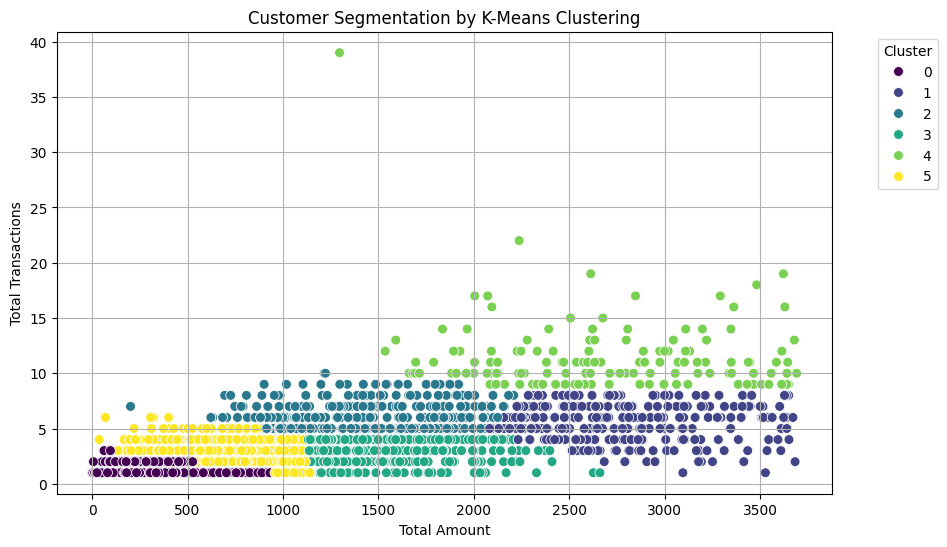

In [ ]:
# Step 2: Inspect the Data
print("Shape of the DataFrame:", df.shape)
print("\nFirst few rows of the DataFrame:")
print(df.head())
print("\nColumn names and data types:")
print(df.dtypes)
print("\nMissing values per column:")
print(df.isnull().sum())

# Step 3: Summary Statistics
summary_stats = df.describe(include='all')
print("\nSummary Statistics:")
print(summary_stats)

# Step 4: Data Preprocessing
df_cleaned = df.dropna(subset=['CustomerID'])
df_cleaned = df_cleaned[(df_cleaned['Quantity'] >= 0) & (df_cleaned['UnitPrice'] >= 0)]
columns_to_drop = ['StockCode', 'InvoiceDate', 'Description', 'Country']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Step 5: Feature Engineering
df_cleaned['Amount'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
df_total_amount = df_cleaned.groupby('CustomerID')['Amount'].sum().reset_index()
df_total_amount.rename(columns={'Amount': 'TotalAmount'}, inplace=True)
df_total_transactions = df_cleaned.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
df_total_transactions.rename(columns={'InvoiceNo': 'TotalTransactions'}, inplace=True)
df_segmentation = pd.merge(df_total_amount, df_total_transactions, on='CustomerID')

# Step 6: Checking for Outliers
df_segmentation.drop('CustomerID', axis=1, inplace=True)
plt.figure(figsize=(8, 5))
plt.boxplot([df_segmentation['TotalAmount'], df_segmentation['TotalTransactions']], labels=['TotalAmount', 'TotalTransactions'])
plt.title('Box Plot of TotalAmount and TotalTransactions')
plt.ylabel('Values')
plt.show()

# Step 7: Removing Outliers from TotalAmount column
Q1 = df_segmentation['TotalAmount'].quantile(0.25)
Q3 = df_segmentation['TotalAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_segmentation = df_segmentation[(df_segmentation['TotalAmount'] >= lower_bound) & (df_segmentation['TotalAmount'] <= upper_bound)]
print("Shape of DataFrame after removing outliers:", df_segmentation.shape)

# Step 8: Data Scaling using Standardization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_segmentation)
df_scaled = pd.DataFrame(df_scaled, columns=df_segmentation.columns)

# Step 9: Finding Optimal Number of Clusters - Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

# Step 10: Finding Optimal Number of Clusters - Silhouette Score Elbow Method
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score')
plt.grid(True)
plt.show()

# Step 11: Customer Segmentation K-Means Clustering with 6 Clusters
num_clusters = 6
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_model.fit(df_scaled)
df_segmentation['Cluster'] = kmeans_model.labels_

# Step 12: Visualization of Clustering Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalAmount', y='TotalTransactions', hue='Cluster', data=df_segmentation, palette='viridis', s=50)
plt.xlabel('Total Amount')
plt.ylabel('Total Transactions')
plt.title('Customer Segmentation by K-Means Clustering')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


<a name="ex_1"></a>
# Exercise 1: Understanding the Importance of Removing Outliers

**Question**: In the context of data preprocessing, at the step mentioned in regarding the removal of outliers, explain why it is critical to remove outliers before training a machine learning model. Discuss the potential impacts of outliers on model performance and accuracy.

**Answer**:

1. **Impact on Model Performance**: Outliers can significantly skew the distribution of the data, affecting the performance of the model. Models trained on data with outliers may struggle to generalize well to unseen data, leading to poor predictive performance.

2. **Influence on Parameter Estimation**: Outliers can distort the estimation of model parameters, leading to biased results. For example, in linear regression, outliers with extreme values can disproportionately influence the coefficients, leading to incorrect conclusions about the relationship between variables.

3. **Sensitive to Distance-Based Algorithms**: Algorithms that rely on distance metrics, such as K-Means clustering or K-Nearest Neighbors, are particularly sensitive to outliers. Outliers can distort the calculation of distances between data points, leading to incorrect clustering or misclassification.

4. **Decreased Robustness**: Outliers can reduce the robustness of the model by introducing noise and reducing the signal-to-noise ratio. This can lead to overfitting, where the model learns to capture the noise rather than the underlying patterns in the data.

5. **Violation of Assumptions**: Many machine learning algorithms make certain assumptions about the underlying distribution of the data. Outliers can violate these assumptions, leading to model instability and inaccurate predictions.

6. **Data Visualization**: Outliers can distort data visualization, making it difficult to identify patterns and relationships in the data. Removing outliers can lead to clearer visualizations that facilitate better understanding of the data.

removing outliers before training a machine learning model helps ensure that the model learns from clean, representative data and makes accurate predictions. It improves model performance, enhances interpretability, and reduces the risk of making erroneous conclusions based on distorted data distributions.

<a name="ex_2"></a>
# Exercise 2: Exploring Alternative Scaling Techniques

**Question**: The notebook utilizes StandardScaler() for feature scaling. Identify at least one alternative scaling method that could be used in place of StandardScaler(). Implement this alternative method in the notebook and present the results of scaling the dataframe. Briefly compare the outcomes between the two scaling methods.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

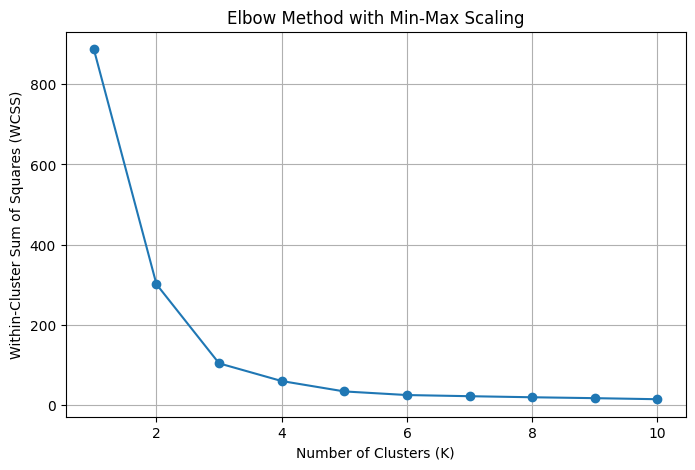

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

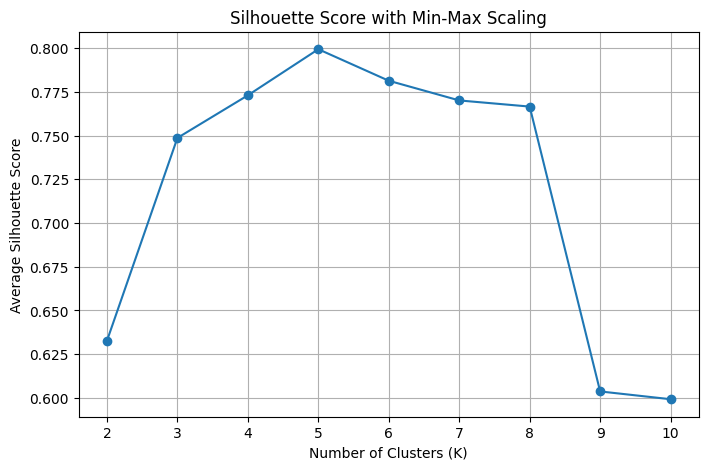

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


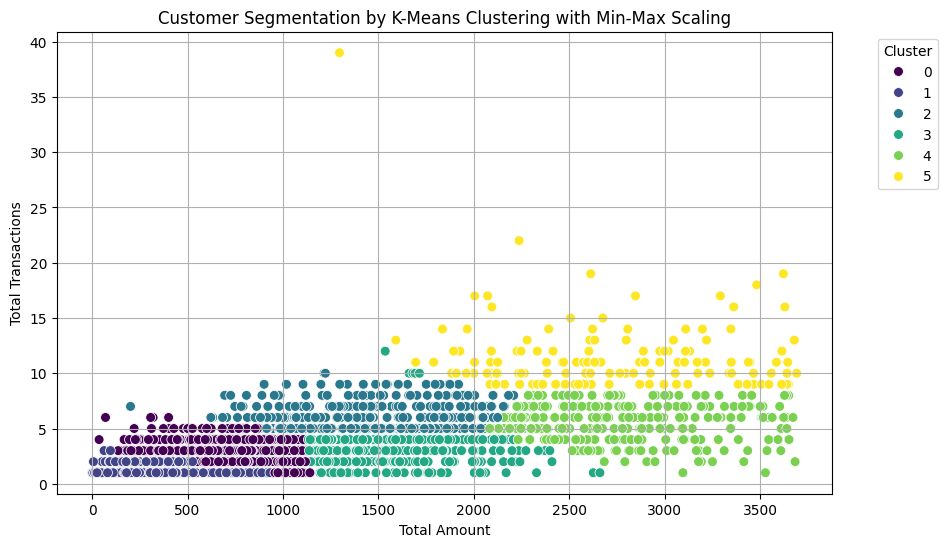

In [ ]:
# Write your code here

from sklearn.preprocessing import MinMaxScaler

# Step 8: Data Scaling using Min-Max Scaling
min_max_scaler = MinMaxScaler()


df_min_max_scaled = min_max_scaler.fit_transform(df_segmentation)
df_min_max_scaled = pd.DataFrame(df_min_max_scaled, columns=df_segmentation.columns)

# Step 9: Finding Optimal Number of Clusters - Elbow Method
wcss_min_max = []
for k in range(1, 11):
    kmeans_min_max = KMeans(n_clusters=k, random_state=42)
    kmeans_min_max.fit(df_min_max_scaled)
    wcss_min_max.append(kmeans_min_max.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss_min_max, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method with Min-Max Scaling')
plt.grid(True)
plt.show()

# Step 10: Finding Optimal Number of Clusters - Silhouette Score Elbow Method with Min-Max Scaled Data
silhouette_scores_min_max = []
for k in range(2, 11):
    kmeans_min_max = KMeans(n_clusters=k, random_state=42)
    kmeans_min_max.fit(df_min_max_scaled)
    silhouette_scores_min_max.append(silhouette_score(df_min_max_scaled, kmeans_min_max.labels_))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores_min_max, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score with Min-Max Scaling')
plt.grid(True)
plt.show()

# Step 11: Customer Segmentation K-Means Clustering with 6 Clusters using Min-Max Scaled Data
num_clusters = 6
kmeans_model_min_max = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_model_min_max.fit(df_min_max_scaled)
df_segmentation['Cluster_Min_Max'] = kmeans_model_min_max.labels_

# Step 12: Visualization of Clustering Results with Min-Max Scaled Data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalAmount', y='TotalTransactions', hue='Cluster_Min_Max', data=df_segmentation, palette='viridis', s=50)
plt.xlabel('Total Amount')
plt.ylabel('Total Transactions')
plt.title('Customer Segmentation by K-Means Clustering with Min-Max Scaling')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



*Brief comparison of the outcomes between the two scaling methods(StandardScalar and Min-Max scalar)*


1. **With Standard Scaler:**
   - Data is centered around zero, with a standard deviation of one.
   - The spread of clusters could be proportional to the variance in each direction, which means some clusters could appear elongated if the feature variances are different.
   - If features have different units or varying scales, standardization can be particularly effective by giving each feature equal weight in the clustering algorithm.
   - The clustering might be more robust to outliers since Standard Scaler does not bound the data to a specific range.

2. **With Min-Max Scaler:**
   - Data is scaled to a fixed range, usually [0, 1].
   - Clusters might appear more spread out if features have smaller variances.
   - Clustering with Min-Max Scaler is sensitive to outliers, which can skew the range of data and, as a result, the clusters.

**Comparing the Outcomes:**

- **Cluster Shape and Size:** With Standard Scaler, clusters may take on a more "spherical" shape in the feature space, making them ideal for K-Means, which assumes spherical clusters. Min-Max Scaler may lead to more compact clusters due to the bounded range.
  
- **Cluster Centroids:** The position of cluster centroids could differ significantly between the two methods due to the differences in scaling.
  
- **Interpretation:** With Min-Max scaling, the interpretation might be more straightforward since the scale is fixed and commonly understood (0 to 1). For Standard Scaling, interpretation requires understanding that the scale is based on the standard deviation units from the mean.
  
- **Sensitivity to Outliers:** The clustering results from Min-Max Scaler may show more variance due to its sensitivity to outliers compared to Standard Scaler.

Standard Scaler might show a clustering pattern that reflects the natural variability in the data with respect to the mean and standard deviation while the Min-Max Scaler could demonstrate a more uniform spread of data points within a fixed range.


<a name="ex_3"></a>
# Exercise 3: Comparing Cluster Evaluation Metrics

**Question**: Describe the difference between the Silhouette Score and the Elbow Method in determining the optimal number of clusters for K-means clustering. Discuss the advantages and limitations of each method.

**Answer**:
1. **Silhouette Score**:
  The Silhouette Score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
   - **Advantages**:
     - Provides a quantitative measure of cluster cohesion and separation.
     - Suitable for evaluating the quality of clustering when the true number of clusters is unknown.
     - Works well for non-convex shapes and uneven cluster sizes.
   - **Limitations**:
     - Computationally intensive, especially for large datasets and high-dimensional data.
     - Requires calculating pairwise distances between data points, which can be memory-intensive.
     - Interpretation can be subjective, as there is no fixed threshold for what constitutes a "good" Silhouette Score.

2. **Elbow Method**:
   The Elbow Method evaluates the within-cluster sum of squares (WCSS) as a function of the number of clusters. It looks for the "elbow" point in the plot of WCSS versus the number of clusters, where the rate of decrease in WCSS slows down.
   - **Advantages**:
     - Simple and intuitive method for selecting the number of clusters.
     - Provides a visual aid for identifying the optimal number of clusters.
     - Computationally efficient compared to the Silhouette Score.
   - **Limitations**:
     - May not always produce a clear "elbow" point, especially when the data does not have well-defined clusters.
     - Relies on the assumption that the optimal number of clusters corresponds to a significant change in WCSS, which may not always be the case.
     - Less effective for datasets with overlapping clusters or non-convex shapes.
The Silhouette Score provides a more nuanced evaluation of cluster quality, considering both cohesion and separation, but it can be computationally expensive and subjective to interpret. On the other hand, the Elbow Method is a simpler and more computationally efficient approach, but it may not always produce clear-cut results, especially for complex datasets.

<a name="ex_4"></a>
# Exercise 4: Understanding K-means Clustering

**Question**: Based on the code provided in the notebook and your own knowledge, explain how the K-means algorithm works. Include a discussion on the initialization of centroids, assignment of points to the nearest cluster, the process of updating centroids, and the convergence criteria for the algorithm.

**Answer**:

The K-means algorithm is an iterative clustering algorithm that partitions a dataset into K clusters based on the similarity of data points.

  **Working of Algorithm**

1. **Initialization of Centroids**:
   - The algorithm begins by randomly initializing K centroids, where each centroid represents the center of a cluster.
   - The centroids can be randomly chosen from the data points or using other initialization methods like K-means++ to improve convergence.

2. **Assignment of Points to the Nearest Cluster**:
   - For each data point in the dataset, calculate the distance to each centroid.
   - Assign the data point to the cluster whose centroid is closest (usually using Euclidean distance).
   - This step effectively assigns each data point to the nearest cluster, forming an initial partitioning of the data.

3. **Process of Updating Centroids**:
   - After assigning all data points to clusters, update the centroids of the clusters.
   - Calculate the mean of all data points assigned to each cluster, which becomes the new centroid for that cluster.
   - This step moves the centroids to the center of their respective clusters, aiming to minimize the within-cluster sum of squares (WCSS).

4. **Convergence Criteria**:
   - Repeat the assignment of points to clusters and updating centroids iteratively until a convergence criterion is met.
   - Common convergence criteria include:
     - No (or minimal) change in the assignment of data points to clusters between iterations.
     - Minimal change in the centroids' positions between iterations.
     - Maximum number of iterations reached.

5. **Convergence**:
   - The algorithm converges when the centroids no longer change significantly between iterations or when the specified maximum number of iterations is reached.
   - At convergence, the clusters stabilize, and the algorithm produces the final clustering solution.

The K-means algorithm iteratively refines the initial clustering by repeatedly assigning data points to the nearest cluster and updating the centroids until convergence. The algorithm aims to minimize the intra-cluster variance, making data points within each cluster as similar as possible, while maximizing the inter-cluster variance, making clusters as dissimilar as possible.

<a name="ex_5"></a>
# Exercise 5: Change Clustering Algorithm

- Research Alternative Clustering Algorithm beyond K-Means such as Hierarchical Clustering, DBSCAN (Density-Based Spatial Clustering of Applications with Noise), and Gaussian Mixture Models (GMM).
- Choose one alternative algorithm to explore.
- Implement the Chosen Algorithm
- Visualize the Results: Similar to how the K-Means results were visualized, plot the clusters determined by the new algorithm. Compare these clusters based on TotalAmount and TotalTransactions.
- Discuss how the clusters formed by the new algorithm differ from those created by K-Means

In [ ]:
# Researching DBSCAN clustering
from sklearn.cluster import DBSCAN

# eps is the maximum distance between two samples for one to be considered as in the neighborhood of the other
# min_samples is the number of samples in a neighborhood for a point to be considered as a core point
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_segmentation['Cluster_DBSCAN'] = dbscan.fit_predict(df_scaled)

# Visualization of Clustering Results with DBSCAN
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalAmount', y='TotalTransactions', hue='Cluster_DBSCAN', data=df_segmentation, palette='viridis', s=50)
plt.xlabel('Total Amount')
plt.ylabel('Total Transactions')
plt.title('Customer Segmentation by DBSCAN')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



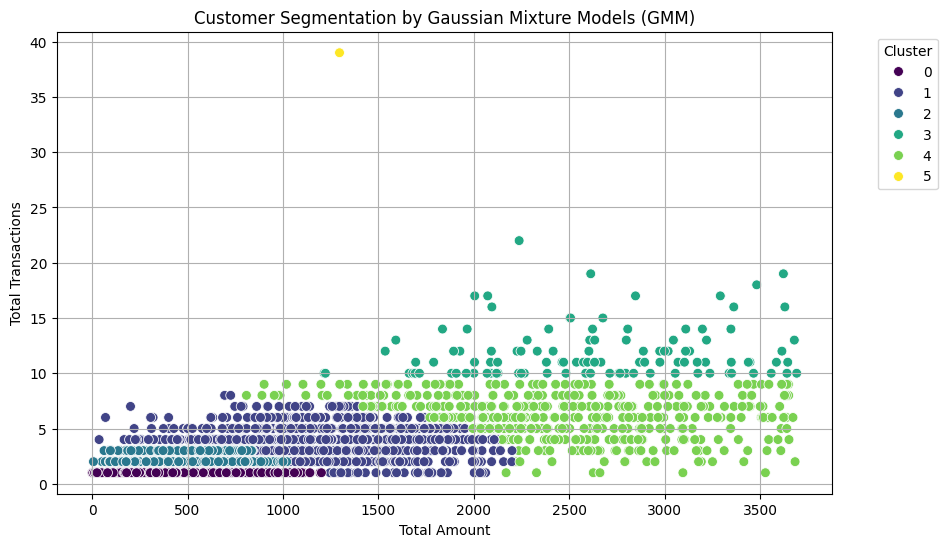

In [ ]:
# Researching GMM
from sklearn.mixture import GaussianMixture

# Step 11: Customer Segmentation using Gaussian Mixture Models (GMM)
gmm = GaussianMixture(n_components=6, random_state=42)
gmm.fit(df_scaled)
df_segmentation['Cluster_GMM'] = gmm.predict(df_scaled)

# Step 12: Visualization of Clustering Results with GMM
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalAmount', y='TotalTransactions', hue='Cluster_GMM', data=df_segmentation, palette='viridis', s=50)
plt.xlabel('Total Amount')
plt.ylabel('Total Transactions')
plt.title('Customer Segmentation by Gaussian Mixture Models (GMM)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


**How the clusters formed by GMM may differ from K-Means:**

1. **Cluster Shape**:
   - GMM allows for more flexible cluster shapes compared to K-Means, which assumes spherical clusters. GMM can capture clusters with different shapes, sizes, and orientations of data points.

2. **Cluster Assignment Uncertainty**:
   - GMM assigns a probability to each data point belonging to each cluster, reflecting uncertainty in cluster assignment. In contrast, K-Means assigns each data point to a single cluster, leading to a "hard" assignment.

3. **Handling Overlapping Clusters**:
   - GMM can naturally handle overlapping clusters since it models data points as coming from multiple Gaussian distributions. This is beneficial for datasets where clusters may overlap.

4. **Impact of Outliers**:
   - GMM is less sensitive to outliers compared to K-Means since it models data using probability distributions. Outliers are less likely to heavily influence the estimation of cluster parameters.

5. **Interpretability**:
   - GMM provides additional information about the uncertainty of cluster assignments through probabilities, which can be useful for interpretation. However, this can also make interpretation more complex compared to K-Means.


<a name="ex_6"></a>
# Exercise 6: Adjust K-Means Parameters

- Experiment with different values of n_clusters (other than 6) to see how they affect the segmentation. You can also adjust other parameters like init, n_init, or max_iter to observe their impact.
- Use silhouette scores to evaluate the segmentation quality for different numbers of clusters or parameter settings. Compare these scores to determine which configuration seems to have the best balance between cluster cohesion and separation.
- Summarize how changes in the number of clusters or other K-Means parameters impact the customer segmentation.

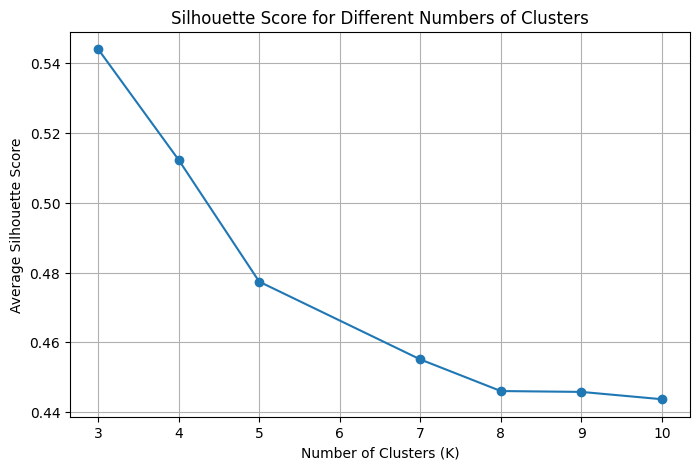

In [ ]:
# Write your code here
from sklearn.metrics import silhouette_score

# Definign a function to perform K-Means clustering with different parameters and evaluate silhouette scores
def kmeans_clustering(n_clusters, init_method='k-means++', n_init=10, max_iter=300):
    kmeans_model = KMeans(n_clusters=n_clusters, init=init_method, n_init=n_init, max_iter=max_iter, random_state=42)
    kmeans_model.fit(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, kmeans_model.labels_)
    return silhouette_avg

# Experiment with different values of n_clusters
n_clusters_list = [3, 4, 5, 7, 8, 9, 10]
silhouette_scores = []

for n_clusters in n_clusters_list:
    silhouette_avg = kmeans_clustering(n_clusters)
    silhouette_scores.append(silhouette_avg)

# Visualizing silhouette scores for different numbers of clusters
plt.figure(figsize=(8, 5))
plt.plot(n_clusters_list, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.grid(True)
plt.show()


1. **Number of Clusters** (**n_clusters**):
   - As the number of clusters increases, silhouette scores may initially increase as the clusters become more specific. However, beyond a certain point, adding more clusters may lead to overfitting and decrease silhouette scores.

2. **Initialization Method** (**init**):
   - Changing the initialization method (e.g., 'k-means++' or 'random') may affect convergence and the quality of the final clustering. 'k-means++' generally provides better initial centroids, leading to faster convergence and potentially higher silhouette scores.

3. **Number of Initializations** (**n_init**):
   - Increasing **n_init** allows the algorithm to run K-Means multiple times with different initializations and select the clustering with the lowest inertia. This can improve the chances of finding better clustering solutions.

4. **Maximum Number of Iterations** (**max_iter**):
   - Increasing **max_iter** allows K-Means to run for more iterations, potentially leading to better convergence. However, setting it too high may increase computational time without significant improvement in silhouette scores.

 By experimenting with different values of n_clusters and other K-Means parameters, we can find a configuration that achieves a good balance between cluster cohesion and separation, resulting in meaningful customer segmentation.